In [560]:
#2 ans

In [561]:
import pandas as pd

df = pd.read_csv("/content/Salary_Data (1).csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [562]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [564]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


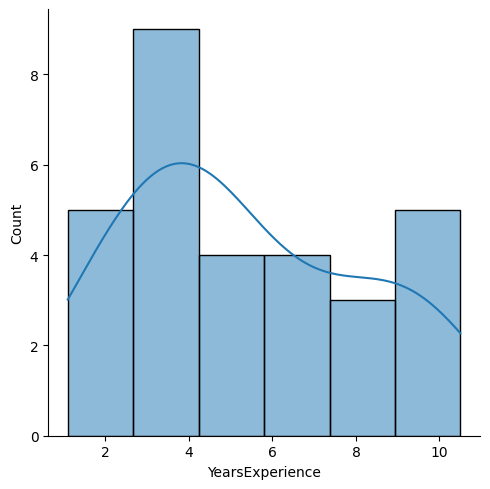

In [565]:
import seaborn as sns
sns.displot(df['YearsExperience'],kde=True)

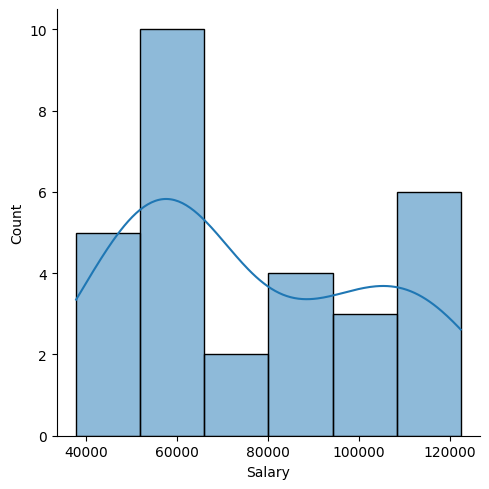

In [566]:
sns.displot(df['Salary'],kde=True)

In [567]:
model = smf.ols("Salary~YearsExperience",data=df).fit()

In [568]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        12:42:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

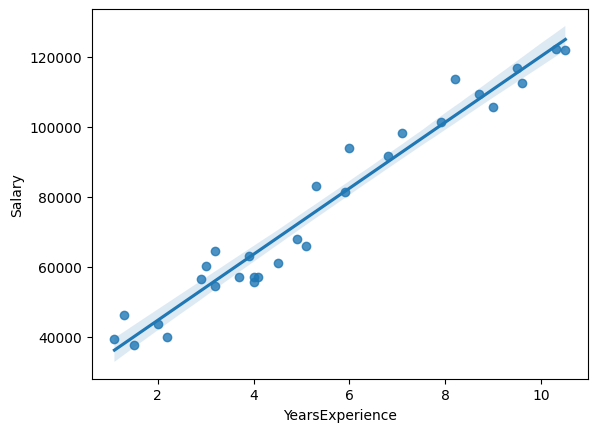

In [569]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

In [570]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [571]:
print(model.tvalues,'|n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 |n Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [572]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [573]:
Salary = (25792.200199) + (9449.962321)*(5)
Salary

73042.01180400001

In [574]:
new_data=pd.Series([5,9])
new_data


0    5
1    9
dtype: int64

In [575]:
pred = model.predict(df["YearsExperience"])

In [576]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [577]:
data_pred=pd.DataFrame(new_data,columns=['Salary'])
data_pred

,Salary
0,5
1,9


In [578]:
rmse = np.sqrt(np.mean((np.array(df["Salary"])-np.array(pred))**2))

In [579]:
rmse

5592.043608760662

<Axes: xlabel='YearsExperience', ylabel='Salary'>

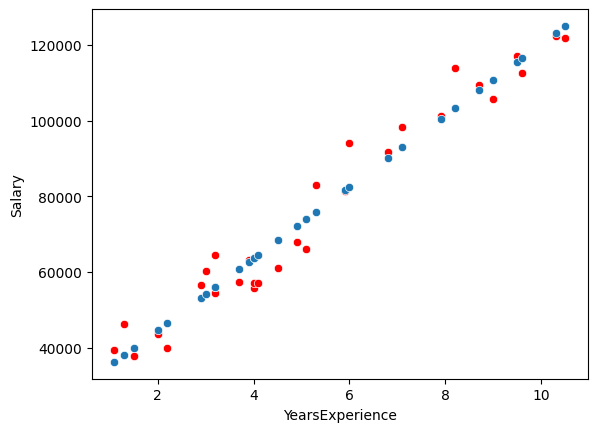

In [580]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df,color="red")
sns.scatterplot(x="YearsExperience",y=pred,data=df)

In [581]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=df).fit() #log transformation

In [582]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           3.25e-13
Time:                        12:42:08   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [583]:
pred2 = model2.predict(df["YearsExperience"])

In [584]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [585]:
rmse2 = np.sqrt(np.mean((np.array(df["Salary"])-np.array(pred2))**2))
rmse2

10302.893706228306

<Axes: xlabel='YearsExperience', ylabel='Salary'>

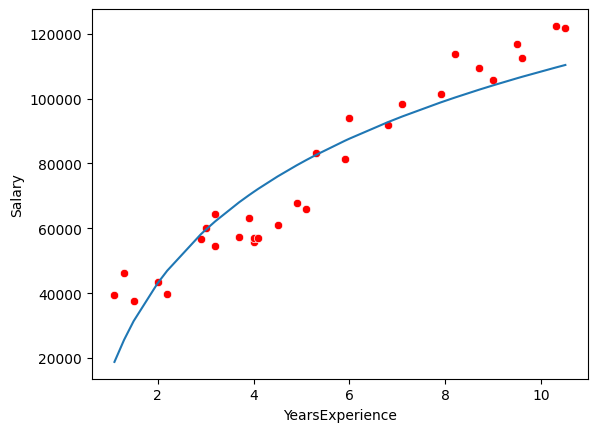

In [586]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df,color="red")
sns.lineplot(x="YearsExperience",y=pred2,data=df)

In [587]:
model3 = smf.ols("np.log(Salary)~YearsExperience",data = df).fit()#exponential transformation
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           7.03e-18
Time:                        12:42:08   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [588]:
pred3 = model3.predict(df["YearsExperience"])
pred3

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [589]:
pred3=np.exp(pred3)

In [590]:
rmse3 = np.sqrt(np.mean((np.array(df["Salary"])-np.array(pred3))**2))
rmse3

7213.235076620168

<Axes: xlabel='YearsExperience', ylabel='Salary'>

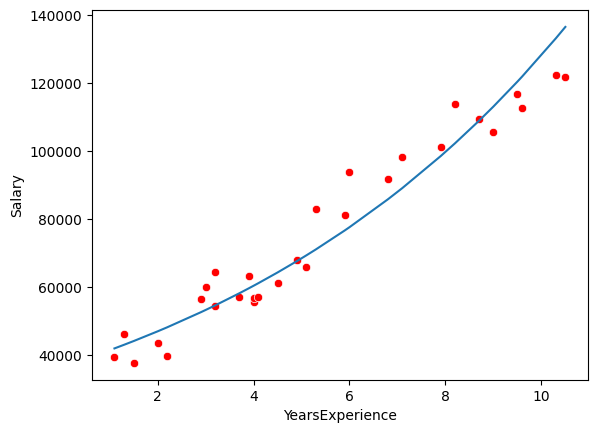

In [591]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df,color="red")
sns.lineplot(x="YearsExperience",y=pred3,data=df)

In [592]:
df["YearsExperience_sq"]=df["YearsExperience"]*df["YearsExperience"] #sqre transformation

df.head()

,YearsExperience,Salary,YearsExperience_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84


In [593]:
model4 = smf.ols("np.log(Salary)~YearsExperience+YearsExperience_sq",data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           3.95e-18
Time:                        12:42:09   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [594]:
pred4 = model4.predict(df[["YearsExperience","YearsExperience_sq"]])

In [595]:
rmse4 = np.sqrt(np.mean((np.array(df["Salary"])-np.array(pred4))**2))
rmse4

80630.25757330736

<Axes: xlabel='YearsExperience', ylabel='Salary'>

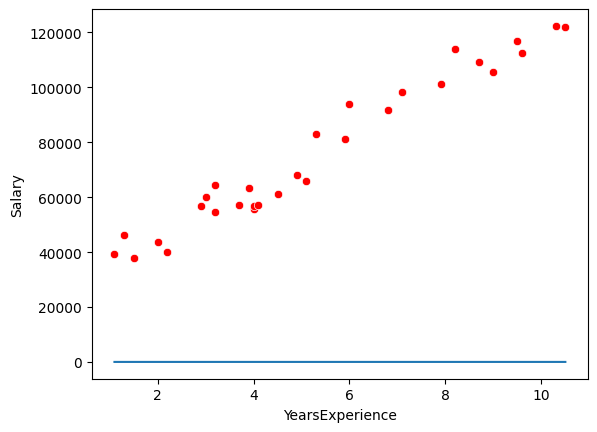

In [596]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df,color="red")
sns.lineplot(x="YearsExperience",y=pred4,data=df)

In [597]:
print(rmse)
print(rmse2)
print(rmse3)
print(rmse4)

5592.043608760662
10302.893706228306
7213.235076620168
80630.25757330736
